In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [6]:
# Load your historical stock price data from a CSV file
microsoft = pd.read_csv("C:/Users/Lenovo/Desktop/MSFT.csv")

In [7]:
#display the first five rows
microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [8]:
#display the shape of the dataset
microsoft.shape

(8525, 7)

In [9]:
microsoft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8.525000e+03
mean,28.220247,28.514473,27.918967,28.224480,23.417934,6.045692e+07
std,28.626752,28.848988,28.370344,28.626571,28.195330,3.891225e+07
min,0.088542,0.092014,0.088542,0.090278,0.058081,2.304000e+06
25%,3.414063,3.460938,3.382813,3.414063,2.196463,3.667960e+07
50%,26.174999,26.500000,25.889999,26.160000,18.441576,5.370240e+07
75%,34.230000,34.669998,33.750000,34.230000,25.392508,7.412350e+07
max,159.449997,160.729996,158.330002,160.619995,160.619995,1.031789e+09


In [10]:
#dataset information
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


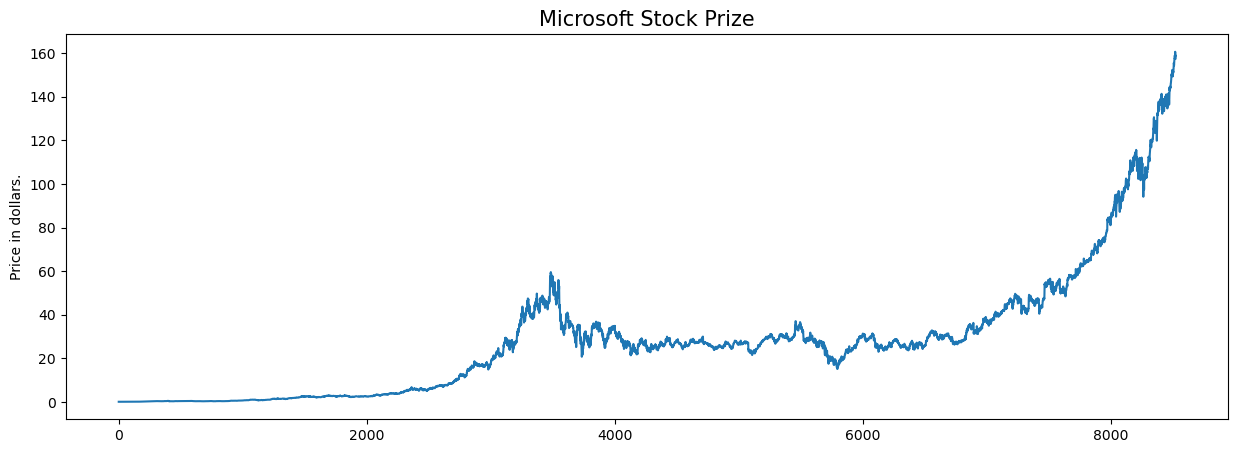

In [11]:
plt.figure(figsize=(15,5))
plt.plot(microsoft['Close'])
plt.title('Microsoft Stock Prize', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [12]:
microsoft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [13]:
microsoft[microsoft['Close'] == microsoft['Adj Close']].shape


(32, 7)

In [14]:
microsoft = microsoft.drop(['Adj Close'], axis=1)

In [15]:
#display the null values in the column
microsoft.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

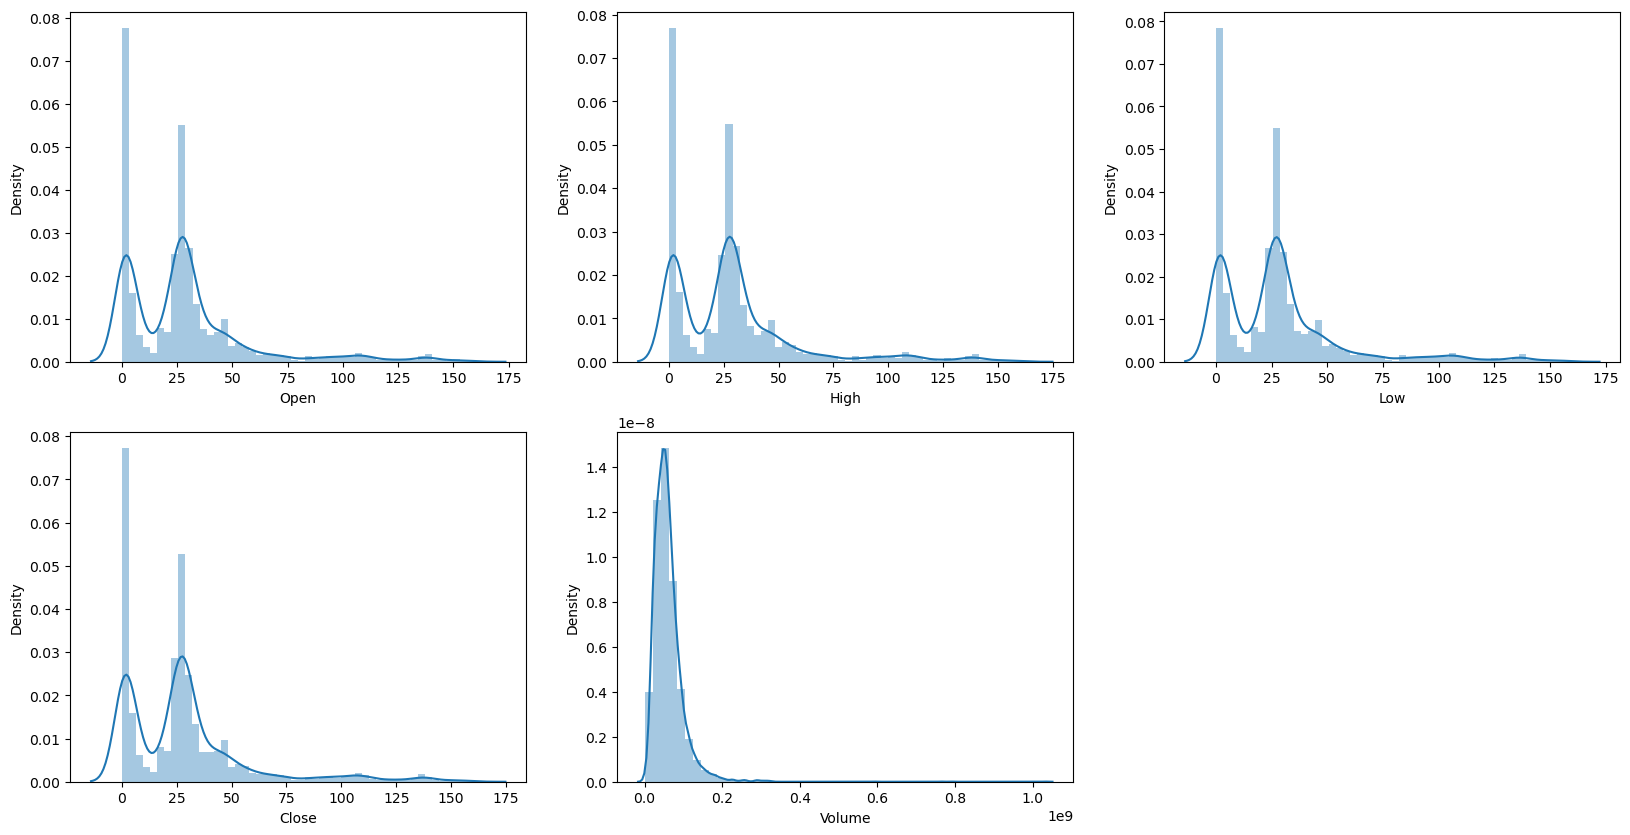

In [16]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(microsoft[col])
plt.show()


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

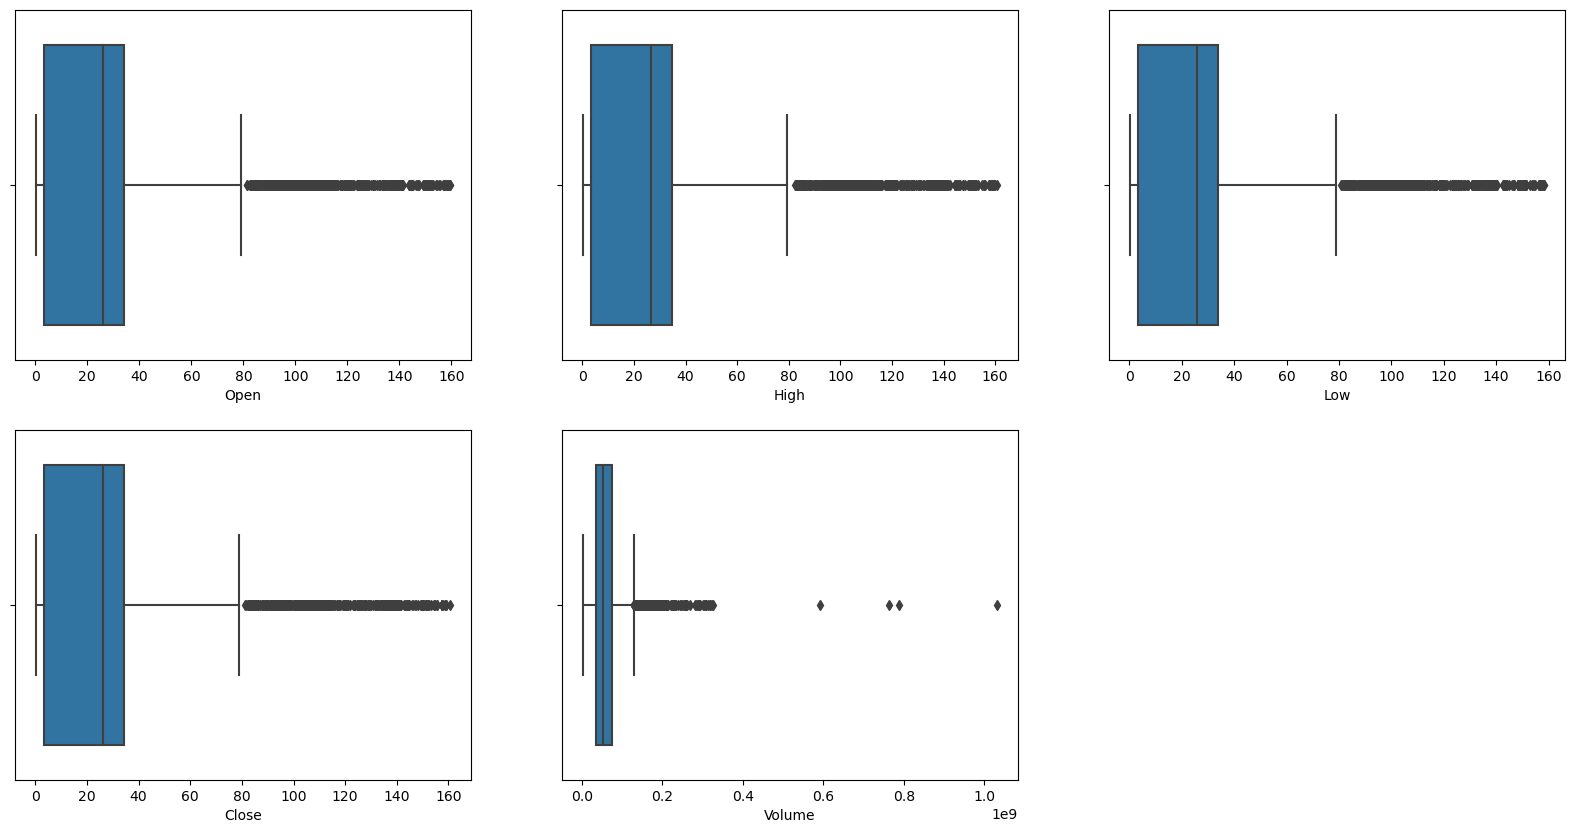

In [17]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(microsoft[col])
plt.show()


In [18]:
splitted = microsoft['Date'].str.split('-', expand=True)
microsoft['day'] = splitted[2].astype('int')
microsoft['month'] = splitted[1].astype('int')
microsoft['year'] = splitted[0].astype('int')
microsoft.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800,13,3,1986
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,14,3,1986
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,17,3,1986
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,18,3,1986
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,19,3,1986


In [19]:
microsoft['is_quarter_end'] = np.where(microsoft['month']%3==0,1,0)
microsoft.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800,13,3,1986,1
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,14,3,1986,1
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,17,3,1986,1
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,18,3,1986,1
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,19,3,1986,1


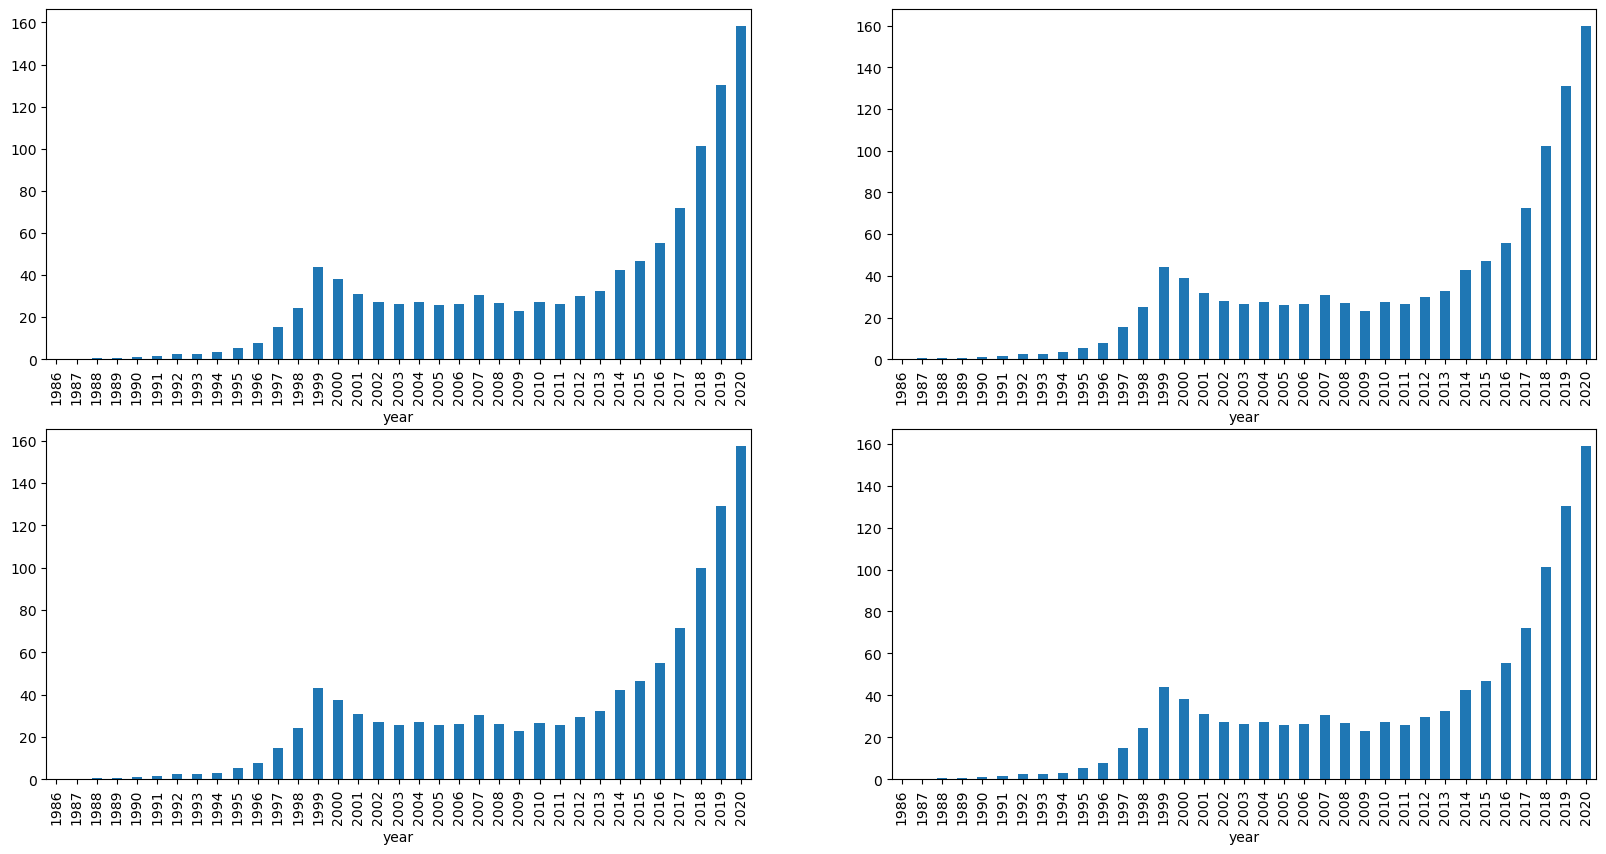

In [20]:
data_grouped = microsoft.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [21]:
microsoft.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,28.222251,28.513631,27.914680,28.222111,6.208880e+07,15.718402,6.111366,2002.623122
1,28.216294,28.516136,27.927422,28.229154,5.723811e+07,15.779289,7.453975,2002.505927


In [22]:
microsoft['open-close'] = microsoft['Open'] - microsoft['Close']
microsoft['low-high'] = microsoft['Low'] - microsoft['High']
microsoft['target'] = np.where(microsoft['Close'].shift(-1) > microsoft['Close'], 1, 0)


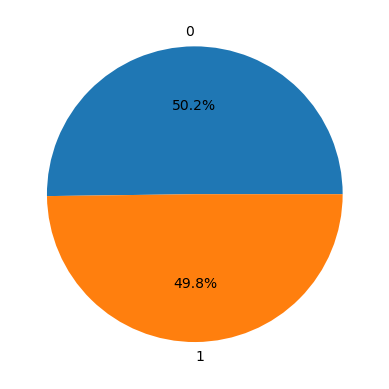

In [23]:
plt.pie(microsoft['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()


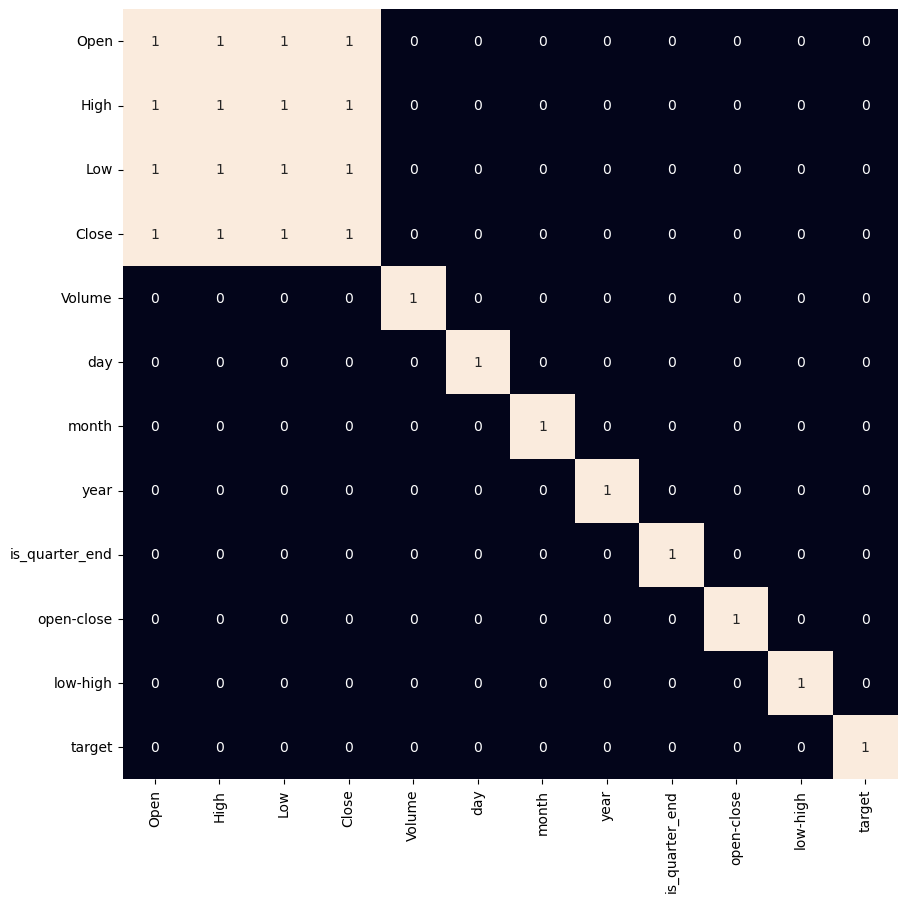

In [27]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(microsoft.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [28]:
features = microsoft[['open-close', 'low-high', 'is_quarter_end']]
target = microsoft['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(7672, 3) (853, 3)
